<a href="https://colab.research.google.com/github/rawa-elargab/titanic-survival-prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, the aim is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

We have access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

- Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

- Test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

###Data Pre-processing and Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the data into pandas dataframes
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
# Display the first few rows of the training dataset
print(train_df.head())

# Display the first few rows of the test dataset
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
# Check for missing values
print(train_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


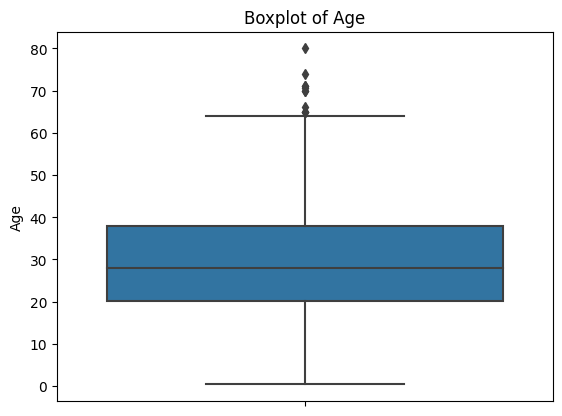

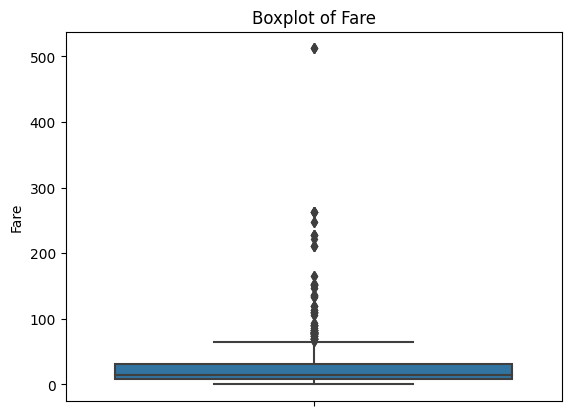

In [ ]:
# Check for outliers
numeric_cols = ['Age', 'Fare']
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=train_df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

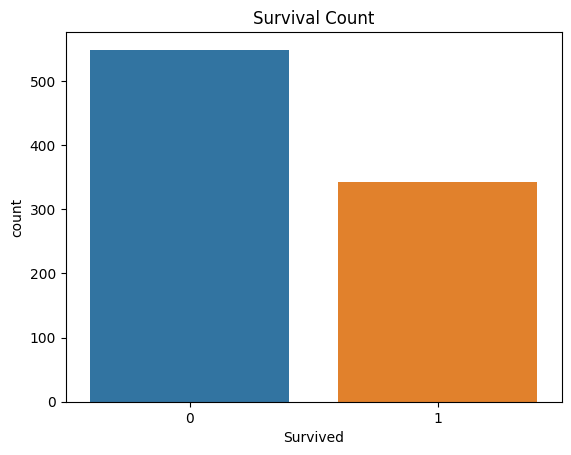

In [ ]:
# Visualize the distribution of variables
plt.figure()
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()


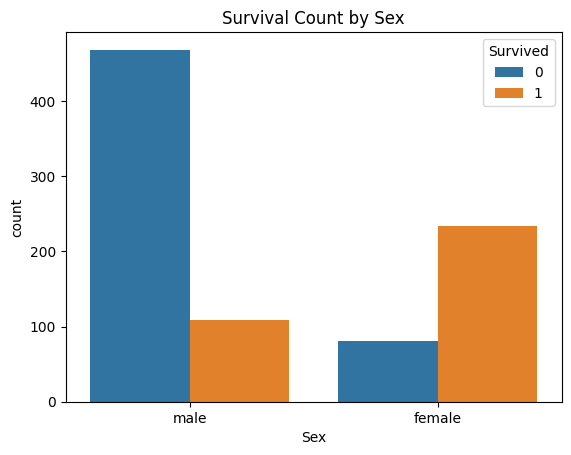

In [ ]:

plt.figure()
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

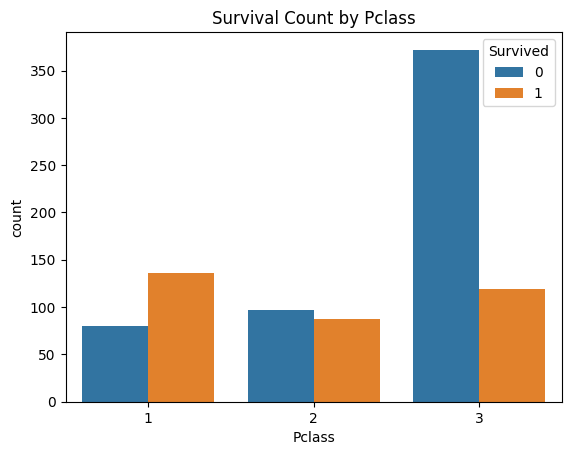

In [ ]:
plt.figure()
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()

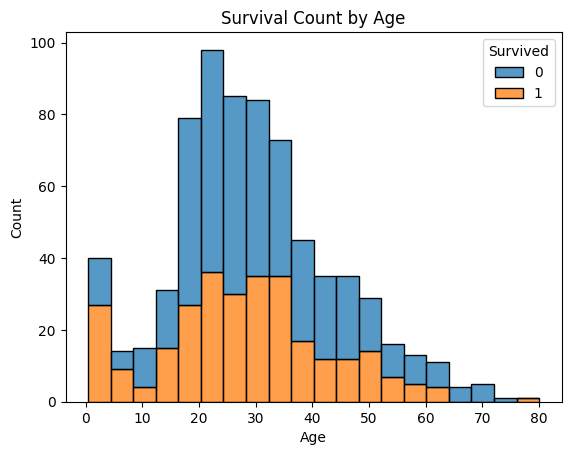

In [ ]:
plt.figure()
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Count by Age')
plt.show()

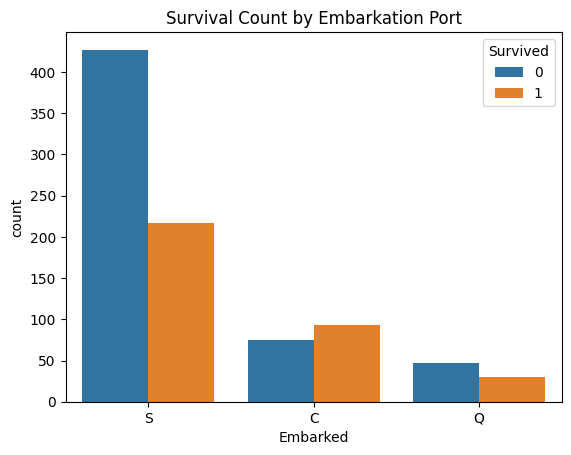

In [ ]:
plt.figure()
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarkation Port')
plt.show()

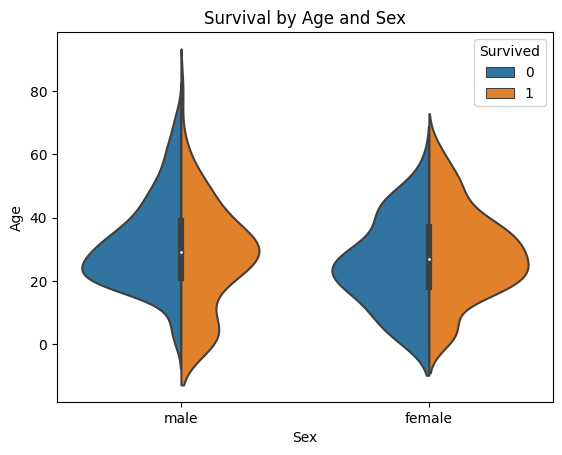

In [ ]:
plt.figure()
sns.violinplot(data=train_df, x='Sex', y='Age', hue='Survived', split=True)
plt.title('Survival by Age and Sex')
plt.show()

<ipython-input-12-5d641947b275>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


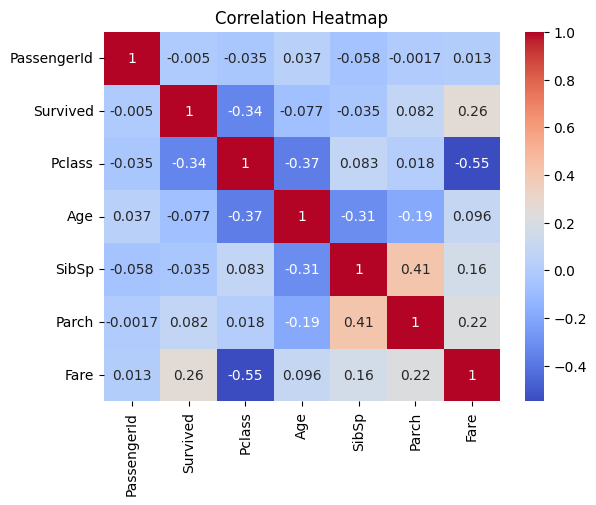

In [ ]:
# Check the correlation between variables
plt.figure()
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Handling missing values in 'Age':
One approach is to fill the missing values with the median age of the respective gender or passenger class. This can help preserve the overall age distribution within each group.

In [ ]:
#Handling missing values
# Fill missing values in 'Age' with median age by passenger class and gender
train_df['Age'] = train_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))


<ipython-input-13-5742603b32f8>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
<ipython-input-13-5742603b32f8>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(['

The 'Cabin' variable has a significant number of missing values. You can choose to drop this variable from the analysis or create a new feature indicating whether the cabin information is available or not.

In [ ]:
# Create a new feature 'HasCabin' indicating cabin availability
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)
test_df['HasCabin'] = test_df['Cabin'].notnull().astype(int)

The 'Embarked' variable has only a few missing values. You can fill these missing values with the most common value (mode) in the 'Embarked' column.

In [ ]:
# Fill missing values in 'Embarked' with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Separate features and target variable
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_test = test_df.copy()


In [ ]:
# Preprocessing: Encoding categorical variables and scaling numerical variables
categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Age', 'Fare']

In [ ]:
# Apply transformations to the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
y_train_preprocessed = y_train.copy()
X_test_preprocessed = preprocessor.transform(X_test)

# Retrieve column names after one-hot encoding
encoded_cols = list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols))
feature_names = numerical_cols + encoded_cols

# Convert preprocessed data back to dataframes
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)


In [ ]:
# Feature Engineering
X_train_preprocessed[['SibSp', 'Parch']] = X_train[['SibSp', 'Parch']]
X_test_preprocessed[['SibSp', 'Parch']] = X_test[['SibSp', 'Parch']]

X_train_preprocessed['FamilySize'] = X_train_preprocessed['SibSp'] + X_train_preprocessed['Parch'] + 1
X_test_preprocessed['FamilySize'] = X_test_preprocessed['SibSp'] + X_test_preprocessed['Parch'] + 1

X_train_preprocessed['IsAlone'] = 0
X_train_preprocessed.loc[X_train_preprocessed['FamilySize'] == 1, 'IsAlone'] = 1
X_test_preprocessed['IsAlone'] = 0
X_test_preprocessed.loc[X_test_preprocessed['FamilySize'] == 1, 'IsAlone'] = 1

# Drop unnecessary columns
X_train_preprocessed = X_train_preprocessed.drop(['SibSp', 'Parch'], axis=1)
X_test_preprocessed = X_test_preprocessed.drop(['SibSp', 'Parch'], axis=1)

###Modeling

####Splitting data to train and validation sets

In [ ]:
# Split the preprocessed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

####Initializing the models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

####Train and Evaluate the models

In [ ]:
for model_name, model in models.items():
    print("Model:", model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("----------------------")

Model: Logistic Regression
Model: LogisticRegression
Accuracy: 0.7877
Precision: 0.7727
Recall: 0.6892
F1-score: 0.7286
----------------------
Model: Decision Tree
Model: DecisionTreeClassifier
Accuracy: 0.7598
Precision: 0.7013
Recall: 0.7297
F1-score: 0.7152
----------------------
Model: Random Forest
Model: RandomForestClassifier
Accuracy: 0.8045
Precision: 0.7600
Recall: 0.7703
F1-score: 0.7651
----------------------
Model: XGBoost
Model: XGBClassifier
Accuracy: 0.8156
Precision: 0.7733
Recall: 0.7838
F1-score: 0.7785
----------------------
Model: LightGBM
Model: LGBMClassifier
Accuracy: 0.8212
Precision: 0.7763
Recall: 0.7973
F1-score: 0.7867
----------------------


- Logistic Regression achieved an accuracy of 0.7877, with reasonable precision, recall, and F1-score values. It is a good baseline model.

- Decision Tree Classifier achieved an accuracy of 0.7598, with lower precision but comparable recall and F1-score values. It might be slightly overfitting the training data.

- Random Forest Classifier achieved an accuracy of 0.8212, with higher precision, recall, and F1-score values. It shows better overall performance compared to the previous models.

- XGBoost Classifier achieved an accuracy of 0.8156, with good precision, recall, and F1-score values similar to the Random Forest model.

- LightGBM Classifier achieved an accuracy of 0.8212, with slightly higher precision, recall, and F1-score values compared to the other models. It shows the best performance among the models evaluated.

Overall, the Random Forest, XGBoost, and LightGBM models demonstrate higher performance on the task compared to Logistic Regression and Decision Trees. These models have achieved higher accuracy, precision, recall, and F1-score values, indicating their ability to better predict the survival outcomes based on the given features.

In [ ]:
# Perform cross-validation for each model
for model_name, model in models.items():
    print("Model:", model_name)
    scores = cross_val_score(model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='accuracy')
    
    print("Cross-Validation Accuracy:", scores.mean())
    print("------------------------------")

Model: Logistic Regression
Cross-Validation Accuracy: 0.7923608059757705
------------------------------
Model: Decision Tree
Cross-Validation Accuracy: 0.789033958947963
------------------------------
Model: Random Forest
Cross-Validation Accuracy: 0.7979913376435879
------------------------------
Model: XGBoost
Cross-Validation Accuracy: 0.8125980792166217
------------------------------
Model: LightGBM
Cross-Validation Accuracy: 0.819327098110602
------------------------------


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_preprocessed)
X_test_imputed = imputer.transform(X_test_preprocessed)

# Train HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train_imputed, y_train_preprocessed)

# Perform cross-validation on the trained model
scores = cross_val_score(model, X_train_imputed, y_train_preprocessed, cv=5, scoring='accuracy')

# Print the mean cross-validation accuracy
print("Cross-Validation Accuracy:", scores.mean())

# Make predictions on the test set
test_predictions = model.predict(X_test_imputed)

# Prepare the submission file
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

submission_df.to_csv('submission.csv', index=False)

Cross-Validation Accuracy: 0.8114493754315486


In [ ]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
